In [102]:
# import packages
import tensorflow as tf
import numpy as np

In [103]:
print(tf.__version__)

2.13.0


In [104]:
# import our mnist data set for hand written recognition
mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9


In [105]:
# load and split our data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [106]:
# check the size of our data
print("X_TEST",len(x_test))
print("Y_TEST", len(y_test))

X_TEST 10000
Y_TEST 10000


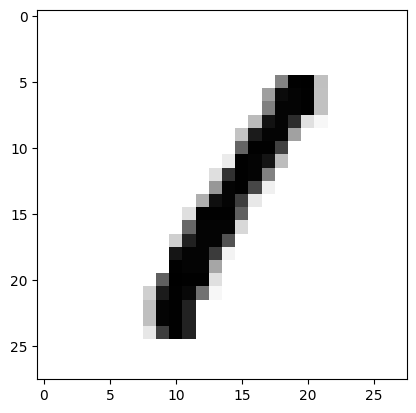

In [107]:
# visualize our data
import matplotlib.pyplot as plt
plt.imshow(x_train[3], cmap= plt.cm.binary)
plt.show()

In [108]:
# lets normalize and visualize our data

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [109]:
# view our normalize data
print(x_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


<function matplotlib.pyplot.show(close=None, block=None)>

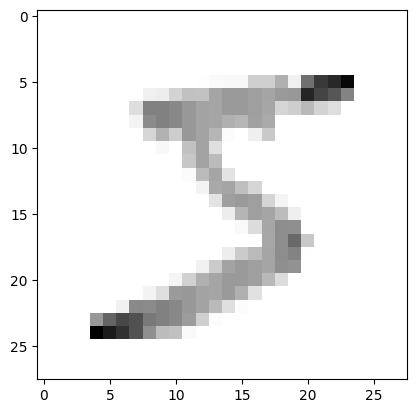

In [110]:
# visualize our normalized dat
plt.imshow(x_train[0], cmap= plt.cm.binary)
plt.show

# Creating our model

In [113]:
# Import our sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

from keras.metrics import categorical_crossentropy

In [114]:
# Model Architecture
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [115]:
# compile the model
model.compile(
              optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

## Train the Model

In [116]:
# Training the Model
model.fit(x=x_train,
          y=y_train,
          batch_size=10,
          epochs=3
          )

Epoch 1/3
6000/6000 [==============================] - 23s 4ms/step - loss: 0.4754 - accuracy: 0.8757
Epoch 2/3
6000/6000 [==============================] - 22s 4ms/step - loss: 0.2204 - accuracy: 0.9365
Epoch 3/3
6000/6000 [==============================] - 23s 4ms/step - loss: 0.1684 - accuracy: 0.9512


In [117]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (10, 784)                 0         
                                                                 
 dense_13 (Dense)            (10, 128)                 100480    
                                                                 
 dense_14 (Dense)            (10, 128)                 16512     
                                                                 
 dense_15 (Dense)            (10, 10)                  1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Checking Accuracy and Loss of Model

In [122]:
# Flatten the test images if needed
x_test_flat = x_test.reshape(x_test.shape[0], -1)
print("X_Test_Flat: ", x_test_flat)

# Evaluate the model with the same batch size
val_loss, val_acc = model.evaluate(x_test_flat, y_test, batch_size=10)
print("Validation Loss", val_loss, "\n","Validation Accuracy", val_acc)

X_Test_Flat:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1591 - accuracy: 0.9526
Validation Loss 0.15905235707759857 
 Validation Accuracy 0.9526000022888184


## Saving our model

In [123]:
# save the entire model
model.save('my_mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Import and use model to make predictions

In [124]:
from tensorflow.keras.models import load_model

# use loaded model and make predictions
loaded_model = load_model("my_mnist_model.h5")

In [125]:
# make predictions
predictions = loaded_model.predict([x_test])

313/313 [==============================] - 1s 3ms/step


In [129]:
print(np.argmax(predictions[0]))

7


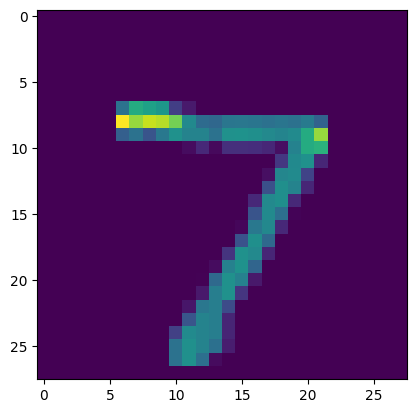

In [130]:
# plot prediction and verify
plt.imshow(x_test[0])
plt.show()